# Comparative Analysis
In this notebook, we compare ClaSS with different competitors regarding scalability.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import gc
import Orange
import sys
sys.path.append("../")

from tqdm import tqdm
from scipy import stats

In [3]:
from src.visualizer import plot_profile, plot_profile_with_ts
from src.utils import load_combined_dataset, load_benchmark_dataset
from src.clazz.window_size import suss

Let's choose a score for evaluation (F1 or Covering).

In [4]:
eval_score = "covering_score"

In [5]:
df_comb = load_combined_dataset()
df_comb['window_size'] = df_comb.time_series.apply(lambda ts: np.int64(suss(ts[:10_000])))
df_comb['ts_len'] = df_comb.time_series.apply(len)
# takes too much space
df_comb.drop("time_series", axis=1, inplace=True)
df_comb.head()

,name,window_size,change_points,ts_len
0,Adiac,22,"[572, 1012, 1232]",1408
1,ArrowHead,32,[753],1506
2,Beef,66,[705],1410
3,BeetleFly,34,[1280],2560
4,BirdChicken,48,[1280],2560


Let's load the scores from the different methods.

In [6]:
competitors = ["ClaSS", "FLOSS", "Window"] # "BOCD", 
datasets = ["UTSA", "TSSB", "PAMAP", "mHealth", "WESAD", "MIT-BIH-VE", "MIT-BIH-Arr", "SleepDB"]
converters = dict([(column, lambda s: np.sum(eval(s))) for column in ["runtimes"]])
methods, dfs = list(), list()

for candidate_name in competitors:
    methods.append((candidate_name, f"{candidate_name}.csv"))

for idx, (name, file_name) in tqdm(enumerate(methods)):
    df = []
    
    for d in tqdm(datasets):
        tmp = pd.read_csv(f"../experiments/competitor_{d}/{file_name}.gz", usecols=["dataset", eval_score, "runtimes"], converters=converters, compression="gzip")
        tmp["name"] = d
        
        df.append(tmp)
        gc.collect()
        
    df = pd.concat(df)    
    df.sort_values(by="dataset", inplace=True)
    df.reset_index(drop=True, inplace=True)
    dfs.append((name, df))
   
df_runtimes = pd.DataFrame()
df_throughput = pd.DataFrame()
df_scores = pd.DataFrame()

for name, df in dfs:
    df_runtimes["name"] = df["name"]
    df_runtimes["dataset"] = df.dataset
    df_runtimes[name] = df.runtimes
    
    df_throughput["name"] = df["name"]
    df_throughput["dataset"] = df.dataset
    df_throughput[name] = (df_comb.ts_len / df.runtimes)

    df_scores["name"] = df["name"]
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]
    
idx_sizes = np.argsort(df_comb.ts_len).to_numpy()
df_throughput

0it [00:00, ?it/s]
100%|████████████████████████████████████████████| 8/8 [17:23<00:00, 130.41s/it]
1it [17:23, 1043.30s/it]
100%|████████████████████████████████████████████| 8/8 [18:49<00:00, 141.21s/it]
2it [36:13, 1094.14s/it]
100%|████████████████████████████████████████████| 8/8 [17:28<00:00, 131.04s/it]
3it [53:41, 1073.78s/it]


,name,dataset,ClaSS,FLOSS,Window
0,TSSB,Adiac,83.188236,65.779946,1319.958751
1,TSSB,ArrowHead,86.025142,69.045354,1393.038507
2,TSSB,Beef,80.865038,65.592531,1800.030639
3,TSSB,BeetleFly,141.992825,119.055868,1344.947516
4,TSSB,BirdChicken,147.488547,118.670648,1346.263068
5,TSSB,CBF,50.621404,44.931388,1503.029544
6,UTSA,Cane,221.597636,245.318956,1274.414342
7,TSSB,Car,117.036018,98.788731,1406.307905
8,TSSB,Chinatown,1833.880951,116.123226,2165.869506
9,TSSB,ChlorineConcentration,287.204824,343.022476,1344.700920


Let's calculate the sum/mean/std score.

In [32]:
np.round((df_runtimes.iloc[:,2:].sum(axis=0) / 60) / 60, 0)

ClaSS      245.0
FLOSS     1372.0
Window     142.0
dtype: float64

In [56]:
np.round(df_throughput.mean(axis=0), 0)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_1178/2160334973.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  np.round(df_throughput.mean(axis=0), 0)


ClaSS      587.0
FLOSS      204.0
Window    1049.0
dtype: float64

In [9]:
df_throughput.std(axis=0)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_1178/676843339.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_throughput.std(axis=0)


ClaSS     265.424590
FLOSS     316.681563
Window    248.620150
dtype: float64

Let's compute the wins per method.

In [10]:
ranks = df_runtimes.rank(1, method = 'min', ascending=True)
means = np.array(ranks.mean(axis=0))

In [11]:
for mean, name in zip(means, df_runtimes.columns[2:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

ClaSS:wins=15 rank=2.03885
FLOSS:wins=18 rank=2.89865
Window:wins=559 rank=1.0625


Let's plot and output the ranks.

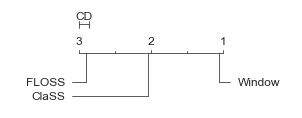

In [12]:
cd = Orange.evaluation.scoring.compute_CD(means, df_runtimes.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_runtimes.columns[2:], cd=cd, width=4, reverse=True, textspace=1, filename=f"../figures/cd_runtime.pdf")

Let's compute wins/losses against ClaSS.

In [13]:
selection = "ClaSS"

for rival in df_runtimes.columns[2:]:
    if rival == selection: continue
    
    df_pair = df_runtimes[[selection, rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=True)
    
    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

ClaSS vs FLOSS: (wins/ties/losses): 551/0/41
ClaSS vs Window: (wins/ties/losses): 18/0/574


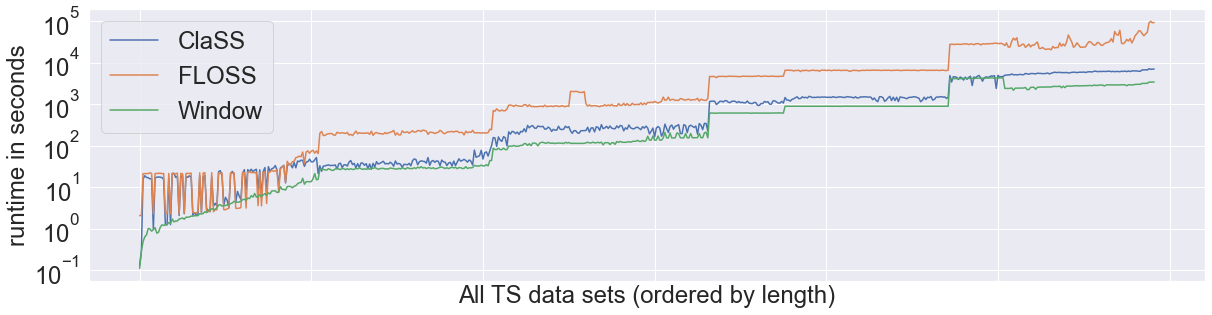

In [14]:
fontsize = 24
_, ax  = plt.subplots(1, figsize=(20,5))

for name in df_runtimes.columns[2:]:
    ax.plot(df_runtimes[name].to_numpy()[idx_sizes], label=name)
    
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
ax.tick_params(
    axis='x',          
    which='both',      
    labelbottom=False,
    labelleft=False
)
ax.legend(loc=2, prop={'size': fontsize})
ax.set_xlabel("All TS data sets (ordered by length)", fontsize=fontsize)
ax.set_ylabel("runtime in seconds", fontsize=fontsize)

ax.set_yscale('log')

names = df_runtimes.name.to_numpy().tolist()      
names = np.array(names)[idx_sizes]

plt.savefig(f"../figures/runtime.pdf", bbox_inches="tight")

,ClaSS,FLOSS,Window
name,,,
MIT-BIH-Arr,2287.764976,10463.833746,1432.654117
MIT-BIH-VE,815.877488,3442.616360,449.956073
PAMAP,537.638550,2311.319995,273.072067
SleepDB,8653.896937,50651.741900,4052.693352
TSSB,16.812626,19.237991,4.489584
UTSA,20.092624,29.049359,6.384859
WESAD,2317.600263,15104.089107,2253.827190
mHealth,56.435755,309.329916,42.596639


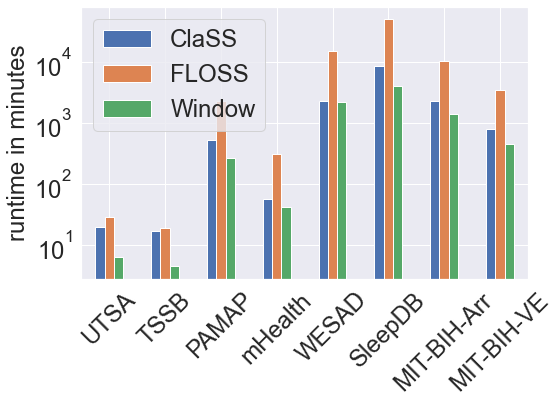

In [15]:
fontsize = 24

ax = df_runtimes.groupby("name").sum().T[['UTSA','TSSB','PAMAP','mHealth','WESAD','SleepDB','MIT-BIH-Arr','MIT-BIH-VE']].T.apply(lambda x: x / 60).plot(kind="bar", figsize=(8,5), rot=45)
    
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)


ax.set_yscale('log')

ax.legend(prop={'size': fontsize})
ax.set_xlabel("", fontsize=fontsize)
ax.set_ylabel("runtime in minutes", fontsize=fontsize)


plt.savefig(f"../figures/bar_runtime.pdf", bbox_inches="tight")

df_runtimes.groupby("name").sum() / 60

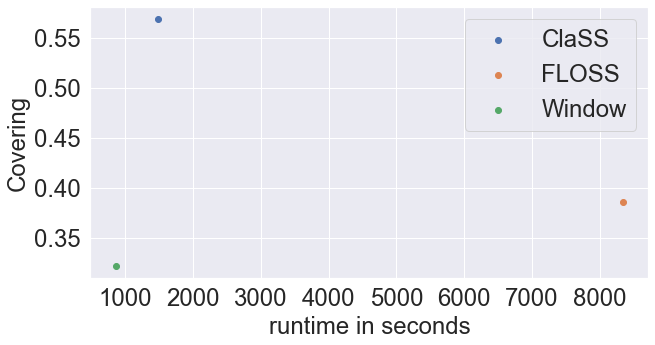

In [58]:
fontsize = 24

_, ax = plt.subplots(1, figsize=(10,5))

for competitor in df_runtimes.columns[2:]:
    ax.scatter(df_runtimes[competitor].mean(), df_scores[competitor].mean(), label=competitor)

ax.set_xlabel("runtime in seconds", fontsize=fontsize)
ax.set_ylabel("Covering", fontsize=fontsize)

ax.legend(prop={'size': fontsize})
#ax.set_yscale('log')

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

plt.savefig(f"../figures/runtime_covering.pdf", bbox_inches="tight")

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

lr = LinearRegression().fit(df_comb.ts_len.to_numpy().reshape(-1,1), df_runtimes.ClaSS.to_numpy().reshape(-1,1))
y_min, y_max = lr.predict(np.array([df_comb.ts_len.min(), df_comb.ts_len.max()]).reshape(-1,1)).flatten()

# mean deviation predicted / actual ts length
np.mean(np.abs(1 - lr.predict(df_comb.ts_len.to_numpy().reshape(-1,1)).flatten() / df_runtimes.ClaSS.to_numpy()))



# print(f"Mean absolute error: {np.round(mean_absolute_error(df_runtimes.ClaSS.to_numpy(), lr.predict(df_comb.ts_len.to_numpy().reshape(-1,1)).flatten()), 3)} seconds")

2.2699909393482023

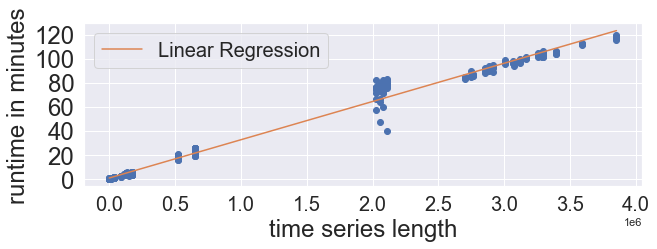

In [18]:
fontsize = 24

_, ax = plt.subplots(1, figsize=(10,3))
ax.scatter(df_comb.ts_len, df_runtimes.ClaSS / 60)

ax.plot([df_comb.ts_len.min(), df_comb.ts_len.max()], [y_min / 60, y_max / 60], c="C1", label="Linear Regression")

# ax.set_yscale('log')

ax.set_xlabel("time series length", fontsize=24)
ax.set_ylabel("runtime in minutes", fontsize=24)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
ax.legend(loc=2, prop={'size': fontsize-4})

plt.savefig(f"../figures/runtime_length.pdf", bbox_inches="tight")

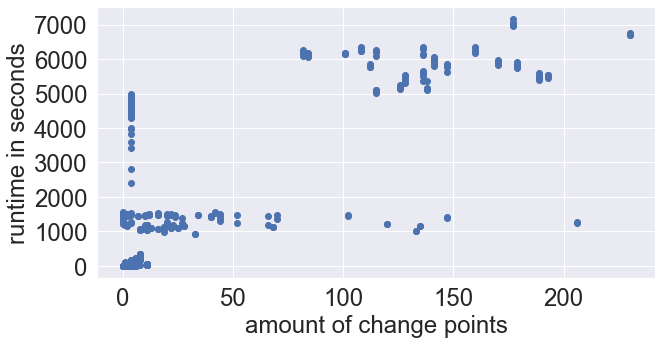

In [19]:
fontsize = 24

_, ax = plt.subplots(1, figsize=(10,5))
ax.scatter(df_comb["change_points"].apply(len), df_runtimes.ClaSS)
ax.set_xlabel("amount of change points", fontsize=24)
ax.set_ylabel("runtime in seconds", fontsize=24)

# ax.set_yscale('log')

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

plt.savefig(f"../figures/runtime_cps.pdf", bbox_inches="tight")

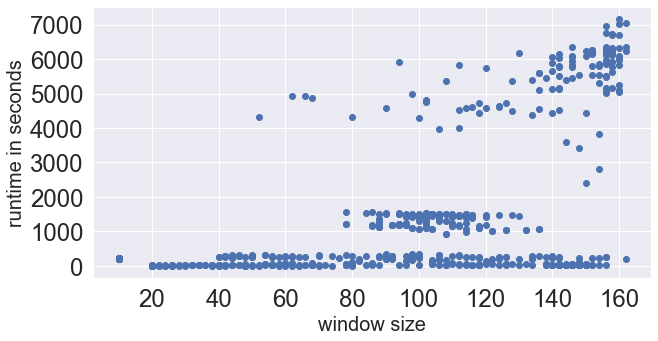

In [20]:
fontsize = 24

_, ax = plt.subplots(1, figsize=(10,5))
ax.scatter(df_comb.window_size, df_runtimes.ClaSS)
ax.set_xlabel("window size", fontsize=20)
ax.set_ylabel("runtime in seconds", fontsize=20)

# ax.set_yscale('log')

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

plt.savefig(f"../figures/runtime_window.pdf", bbox_inches="tight")

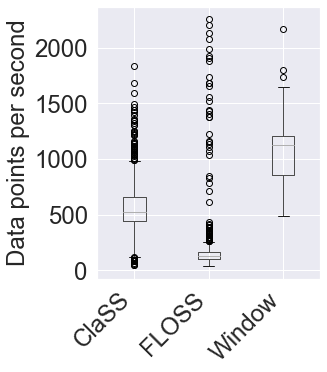

In [51]:
fontsize = 24
_, ax = plt.subplots(figsize=(4,5))

df_throughput.boxplot(ax=ax, rot=90)
ax.set_ylabel("Data points per second", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
ax.set_xticklabels(df_scores.columns[2:], rotation=45, ha="right")
plt.savefig(f"../figures/bp_throughput.pdf", bbox_inches="tight") 

In [57]:
df_throughput.ClaSS.max()

1833.880950561626